In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
import requests
import time
import tweepy
import json
from datetime import datetime


from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())



In [5]:
Users = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"]

All_Sentiment_list=[]



for User in Users:
    
    search_count = 100
    tweet_count = 0
    
    public_tweets = api.user_timeline(User, count=search_count)
    User_Sentiment_list= []
    
    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    
    
    # Loop through all tweets
    for tweet in public_tweets: #["statuses"]:
        #print(json.dumps(tweet, sort_keys=True, indent=4, separators=(',', ': ')))
        #print(tweet["text"])

        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        #print(results)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]  
        
        sentiment = {
            "Tweet Text": tweet["text"],
            "Tweet Order": (search_count - tweet_count),
            "User": User,
            "Compound": compound,
            "Positive": pos,
            "Neutral": neu,
            "Negative": neg,
            "Tweet Time": tweet["created_at"]
            
        }
        
        tweet_count += 1
        
        # Add each value to the appropriate list
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)

                        
        All_Sentiment_list.append(sentiment)
        
        # Append airline results to 'results_list'
   




In [6]:
df_data_grpd = pd.DataFrame(All_Sentiment_list)
#print(df_data_grpd.head())
print(df_data_grpd.tail())

df_data_grpd.to_csv("df_data_grpd.csv")

     Compound  Negative  Neutral  Positive  Tweet Order  \
495    0.6833     0.000    0.796     0.204            5   
496    0.0772     0.000    0.933     0.067            4   
497    0.0000     0.000    1.000     0.000            3   
498    0.1774     0.112    0.705     0.183            2   
499    0.1779     0.000    0.898     0.102            1   

                                            Tweet Text  \
495  RT @jakesilverstein: Rollout of @NYTmag Cultur...   
496  10 women are running for New York’s State Sena...   
497  Senator Orrin Hatch, shielded by aides, waved ...   
498  RT @nytopinion: There is clear, substantial ev...   
499  What's one of the fastest growing sources of g...   

                         Tweet Time      User  
495  Fri Oct 05 02:51:03 +0000 2018  @nytimes  
496  Fri Oct 05 02:47:04 +0000 2018  @nytimes  
497  Fri Oct 05 02:30:06 +0000 2018  @nytimes  
498  Fri Oct 05 02:17:02 +0000 2018  @nytimes  
499  Fri Oct 05 02:02:01 +0000 2018  @nytimes  


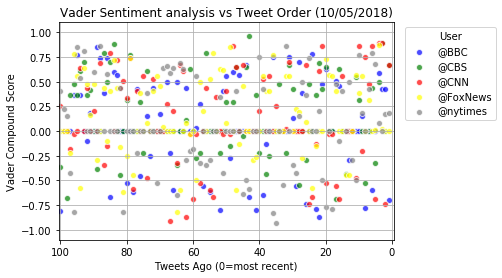

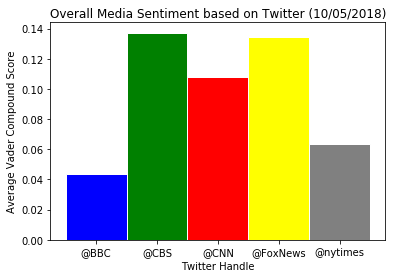

In [7]:
BarMeans = []
colorVals = []

for User in Users:    
    #print(User)
    if User =='@BBC': 
        
        x_values = df_data_grpd.loc[(df_data_grpd['User']=='@BBC')]['Tweet Order']        
        y_values  = df_data_grpd.loc[(df_data_grpd['User']=='@BBC')]['Compound']  
        BarMeans.append(y_values.mean())
        #print(BarMeans)
        color_val = mcolors.to_hex("blue")  #"#F08080" #(0.240, 0.128, 0.128)  #LightCoral #F08080	RGB(240,128,128)
        #size_values = df_data_grpd.loc[(df_data_grpd['type']=='Urban')]['Driver_Cnt_Sqd']
        colorVals.append(color_val) 
        
    elif User =='@CBS':
        
        x_values = df_data_grpd.loc[(df_data_grpd['User']=='@CBS')]['Tweet Order']
        y_values  = df_data_grpd.loc[(df_data_grpd['User']=='@CBS')]['Compound']   
        BarMeans.append(y_values.mean())
        color_val = mcolors.to_hex("green") 
        colorVals.append(color_val) 
    
    elif User =='@CNN':
        
        x_values = df_data_grpd.loc[(df_data_grpd['User']=='@CNN')]['Tweet Order']
        y_values  = df_data_grpd.loc[(df_data_grpd['User']=='@CNN')]['Compound']   
        BarMeans.append(y_values.mean())
        color_val = mcolors.to_hex("red")
        colorVals.append(color_val) 
              
        
    elif User =='@FoxNews':
        
        x_values = df_data_grpd.loc[(df_data_grpd['User']=='@FoxNews')]['Tweet Order']
        y_values  = df_data_grpd.loc[(df_data_grpd['User']=='@FoxNews')]['Compound']    
        BarMeans.append(y_values.mean())
        color_val = mcolors.to_hex("yellow")
        colorVals.append(color_val) 
              
           
    else:
        x_values = df_data_grpd.loc[(df_data_grpd['User']=='@nytimes')]['Tweet Order']
        y_values  = df_data_grpd.loc[(df_data_grpd['User']=='@nytimes')]['Compound']  
        BarMeans.append(y_values.mean()) 
        color_val = mcolors.to_hex("grey") #(.255, .215, 0.000) #'Gold' #gold1	#FFD700	RGB(255,215,0)
        colorVals.append(color_val) 
                 
 
    plt.scatter(x_values, y_values, marker="o", c=color_val, edgecolors="white", alpha=0.70, label=User) 
    


# Incorporate the other graph properties
plt.xlim(100.5, -0.5)
plt.ylim(-1.1, 1.1)


plt.title("Vader Sentiment analysis vs Tweet Order (" + datetime.now().strftime('%m/%d/%Y')+")")
plt.ylabel("Vader Compound Score")
plt.xlabel("Tweets Ago (0=most recent)")
plt.grid()
plt.legend(loc='upper right', bbox_to_anchor=(1.32, 1.0), title="User",markerscale=1.0) 
#plt.text(42, 30, s="Note: Bubble size correlates with driver count per city", fontsize=10)
plt.savefig("ScatterPlot.png")
plt.show()

#print(BarMeans)

plt.bar(Users,BarMeans,color=colorVals, edgecolor="white",width=1.0)
plt.title("Overall Media Sentiment based on Twitter (" + datetime.now().strftime('%m/%d/%Y')+")")
plt.ylabel("Average Vader Compound Score")
plt.xlabel("Twitter Handle")
plt.savefig("BarChart.png")

plt.show()



